<a href="https://colab.research.google.com/github/adenning-1/QNC-2025/blob/main/Copy_of_Gaussian_(Normal)_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/PennNGG/Quantitative-Neuroscience/blob/master/Probability%20Distributions/Python/Gaussian%20%28Normal%29.ipynb)

# Definition

The Gaussian distribution is a continuous function that is often described as the normal distribution or bell-shaped function.

It can be used to describe discrete events when the number of events is very large, in which case it approximates the [binomial distribution](https://colab.research.google.com/drive/1q1KaEjkAzUKRFSLPQ0SFdqU_byc70Oi2?usp=sharing). It is also useful (albeit sometimes overused) because of the Central Limit Theorem, which states that when you add together enough independent random variables, their sum tends to be normally distributed.

Mathematically, the normal distribution is defined by just two parameters, the mean ($\mu$) and variance ($\sigma^2$):

$\quad f(X; \mu_X, \sigma_X^2) = \frac{1}{\sqrt{2\pi\sigma_X^2}}e^-\frac{(X-\mu_X)^2}{2\sigma_X^2}$.

Where we now indicate that the random variable *X* is normally distributed by:

$\quad X\sim(\mu_X, \sigma_X^2)$.

A commonly used variant of the normal distribution is the standard normal, or *Z*, distribution, which can be computed from any normal distribution by subtracting the mean and dividing by the standard deviation:

$\quad Z = \frac{X-\mu_X}{\sigma_X}$.

The standard normal distribution is a good way to get some intuition for how *p*-values are obtained in Null-hypothesis significance testing. Consider a case in which the standard normal distribition is used as the distribution corresponding to the Null hypothesis, and you want to know the probability that you would have obtained your test sample from this distribution. Specifically, a *p*-value measures the probability of obtaining a sample from a particular distribution that is equal to or more extreme as your sample, which corresponds to the fraction of the area under the distribution that meets those conditions.

For a typical one-sided test, we care about values that are greater than or equal to our sample. Thus, a standard statistical threshold of $p=0.05$ for a one-sided test corresponds to the point (measured as a z-scored sample) at which 5% of the *Z* distribution lies to the right of that point, which is 1.6449; i.e., your sample needs to be at least 1.6449 standard deviations greater than the mean to reject the Null hypothesis in this case.

For a two-sided test, we care about values that are as far away or further from the mean in either direction by a particular amound. Thus a standard statistical threshold of $p=0.05$ for a two-sided test corresponds to the point (measured as a z-scored sample) at which 2.5% of the *Z* distribution lies to the right of that point and 2.5% of the *Z* distribution lies to the left of the negative of that point, which is 1.9600; i.e., your sample needs to be at least 1.9600 standard deviations away from the mean in either direction to reject the Null hypothesis in this case.

The mapping between z-scores and p-values is so common that [calculators](https://www.gigacalculator.com/calculators/z-score-to-p-value-calculator.php) and [tables](https://z-table.com) are quite easy to find.

# Getting Started with Code


Matlab code is found in the [NGG Statistics GitHub Repository](https://github.com/PennNGG/Statistics.git) under "Probability Distributions/Gaussian.m".

Python code is included below. First run the code cell just below to make sure all of the required Python modules are loaded, then you can run the other cell(s).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st


# Tutorial

/tmp/ipython-input-1987854634.py:13: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  n_pdf = np.divide(counts, np.trapz(counts, xaxis))


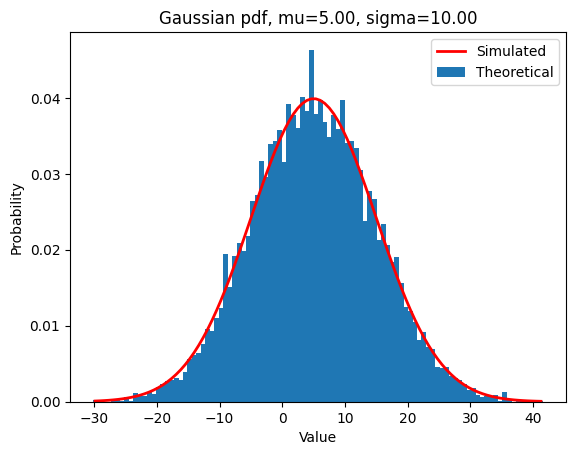

Sample mean = 5.059
Expected value of empirical distribution = 5.058
Expected value of the theoretical distribution = 5.001
Number of different values = 0


/tmp/ipython-input-1987854634.py:49: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  plt.bar(xaxis, np.divide(counts, np.trapz(counts, xaxis)))


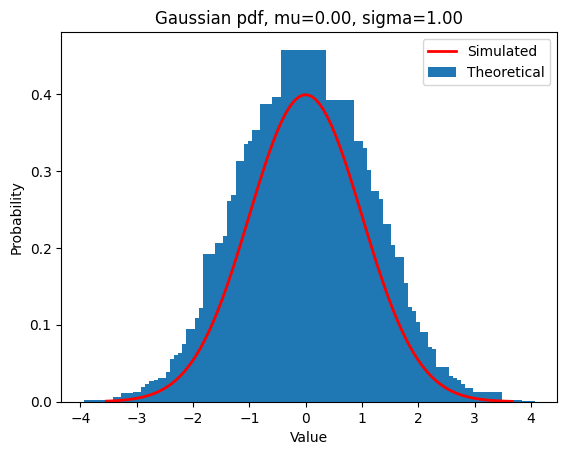

In [2]:
# Let's compare simulated and theoretical Gaussians
mu = 5
sigma = 10
N = 10000

# Get samples
samples = np.random.normal(mu, sigma, N)

# plot histogram for a given number of bins (using trapz to approximate pdf)
nbins = 100
counts, edges = np.histogram(samples, bins=nbins)
xaxis = (edges[1:] + edges[:-1])/2
n_pdf = np.divide(counts, np.trapz(counts, xaxis))
plt.bar(xaxis, n_pdf)

# Show theoretical pdf in red
plt.plot(xaxis, st.norm.pdf(xaxis, mu, sigma), 'r-', linewidth=2)

# labels, ets
plt.title(f'Gaussian pdf, mu={mu:.2f}, sigma={sigma:.2f}')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.legend(['Simulated', 'Theoretical'])
plt.show()

# Some summary statistics
# 1. The sample mean
print(f'Sample mean = {np.mean(samples):.3f}')

# 2. The expected value of the empirical distribution: the sum of probability x value per bin. This should be similar to the sample mean, but recognize that we lost some information from the binning (i.e., use more bins and this should get closer to the sample mean)
print(f'Expected value of empirical distribution = {np.sum(np.prod([xaxis, np.diff(edges), n_pdf], axis=0)):.3f}')

# 3. The expected value of the theoretical distribution
print(f'Expected value of the theoretical distribution = {np.sum(np.prod([xaxis, np.diff(edges), st.norm.pdf(xaxis, mu, sigma)], axis=0)):.3f}')

# Now standardize ("z-score") the samples by subtracting the mean and dividing by the STD
# The harder way
zSamples = np.divide(samples-np.mean(samples), np.std(samples))

# The easier way
z2Samples = st.zscore(samples)

# Check that they are the same
print(f'Number of different values = {np.count_nonzero(zSamples-z2Samples)}')

# Show the distribution of z-scored values
counts, edges = np.histogram(z2Samples, bins=nbins)
xaxis = (edges[1:] + edges[:-1])/2
plt.bar(xaxis, np.divide(counts, np.trapz(counts, xaxis)))

# Show theoretical "standard normal" pdf in red
plt.plot(xaxis, st.norm.pdf(xaxis), 'r-', linewidth=2)

# labels, ets
plt.title(f'Gaussian pdf, mu={np.mean(zSamples):.2f}, sigma={np.std(zSamples):.2f}')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.legend(['Simulated', 'Theoretical'])
plt.show()

# Neuroscience Examples

## Example 1: Log-likelihood ratio from Gaussian spiking statistics

Long story short: the logarithm of the likelihood ratio is cool (see [here](https://www.sciencedirect.com/science/article/pii/S0896627302009716), [here](https://www.jneurosci.org/content/23/37/11539), and [here](https://www.cell.com/neuron/fulltext/S0896-6273(15)00008-2)), and so it seems like it would be a really good thing if the brain could compute it. But how?

Ok, let's back up a bit. A likelihood is just a conditional probability, often used to relate data to a particular hypothesis: *p*(*data* | *hypothesis*). If the data can take on different values, then the likelihood is a function that describes the probability of obtaining each possible value of the data, given that the hypothesis is true. In the brain, you can think of this function as describing, for example, the probability that a particular neuron will fire a certain amount of spikes in some unit of time (the data) given some state of the world, like the presence of a stimulus in the neuron's receptive field (the hypothesis). We use the term "hypothesis" because ultimately we want to use this quantity for inference testing and determine from the data whether or not the hypothesis is actually true (e.g., given the firing rate of the neuron, is the stimulus in its receptive field?). [This guy](https://en.wikipedia.org/wiki/Thomas_Bayes) can tell you more about how to do that, given the likelihood. But the first step is computing or estimating the likelihood, which at least in principle can be determined using something like a controlled experiment: set the hypothesis to be true (e.g., put the stimulus in the neuron's receptive field) and measure the data (e.g., the spiking response). Because the value of the data produced will typically vary from one measure to the next (i.e., it is a random variable), the procedure needs to be repeated many times to estimate the full likelihood function.

The likelihood ratio is just a convenient way of comparing the likelihood associated with two different hypotheses: if the ratio is >1, then the hypothesis in the numerator has a higher likelihood, whereas if the ratio is <1, then the hypothesis in the denominator has a higher likelihood. It is therefore a natural quantity to use in the context of many [psychophysical](htthttps://www.sciencedirect.com/science/article/pii/S0306452214004369ps://) tasks that require a choice between two alternative hypotheses, given some sensory data. Also, taking the logarithm of this ratio of probabilities is a [nice thing to do](httphttps://en.wikisource.org/wiki/Popular_Science_Monthly/Volume_12/April_1878/Illustrations_of_the_Logic_of_Science_IVs://). Basically it means that you can add together the "[weight of evidence](https://projecteuclid.org/download/pdf_1/euclid.ss/1032209661)" provided by different, independent measurements (data), given their associated likelihood ratios.

Ok, now back to our original question: does our brain actually compute (or approximate) the logarithm of the likelihood ratio (now referred to as "logLR"), and if so, how? It seems unlikely that we have explicit representations of two full likelihood functions, then when a given piece of data comes in we take the ratio of those two functions at that value, then compute the likelihood.

It turns out that there is an easier way, and it has a lot to do with the Gaussian distribution (you had forgotten that is why we're here, right?). Consider this magical statement from [this paper](https://www.jneurosci.org/content/12/12/4745.long):

"We compiled these responses into separate 'neuron' and 'antineuron' pools, drawn respectively from the preferred direction and null direction response distributions, and used the difference between the pooled responses to determine a 'decision' for each trial."

They're saying that they are using the responses of two groups of neurons to make a decision; in this case, it's using motion-sensitive neurons in area MT (also called [V5](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4381624/)) of a monkey to make a decision about whether a visual stimulus that the monkey is looking at is moving to the left or right. Notice the words "response distributions." That got your attention, right?

What they mean is, consider the distributions of responses of each of the two pools of neurons, under each of two conditions (left/right motion). So a pool of neurons that respond selectively to rightward motion will have some distribution of responses (measured as, say, number of spikes over a one-second interval) to its preferred stimulus (i.e., rightward motion) and the "null" stimulus (i.e., leftward motion). Same for a leftward-selective neuron, but with preferred=leftward, null=rightward.

Here's a plot of real data recorded from a motion-sensitive neuron in MT of an awake monkey viewing a motion stimulus positioned in the neuron's receptive field and moving in the neuron's preferred or null direction:

![](https://drive.google.com/uc?export=view&id=1qBRTElfVkHxNCa6SecrfVTAeSX4yWXeu)

For the two raster plots on top, each row is a separate trial, each tick is an action potential. You can see by eye that: 1) responses are variable from trial-to-trial (i.e., the output of the neuron represents a random variable); and 2) the responses tend to be slightly larger for preferred versus null motion (that being, of course, the definition of preferred versus null motion for this neuron). If we ignore the specific temporal structure of the spikes that occur on each trial (which [may](https://www.sciencedirect.com/science/article/abs/pii/0959438894900590) or [may not](https://www.jneurosci.org/content/21/5/1676.long) be a reasonable thing to do), we can summarize their responses as a single number: the number of spikes in the one-second interval during which the motion stimulus was presented, given them units of spikes/second. The bottom plot shows the histograms of these responses for each condition.

Now for the payoff. You should note that those histograms look roughly bell-shaped. Let's assume that they are, and that the neural responses in fact represent samples from a Gaussian process; i.e., the likelihood functions describing p(data=neural spike-rate response | hypothesis=motion in a particular direction) are Gaussian (we could [test this idea](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3693611/) using the real data, but here we are making a more theoretical point: what would it buy us if it were in fact true that the data were generated by a Gaussian process?). In that case, and assuming that the pref/null likelihood functions for the neuron have different mean values but the same variance, they would look like this:

![](https://drive.google.com/uc?export=view&id=1kfdbSr8iHSn7YvroNUoQZ8IlOpffnd5o)

and the associated "anti-neuron" functions would look like this:

![](https://drive.google.com/uc?export=view&id=10uDp7MxLm4re41qojvgCgt1B3qTc50kn)

Now, some math! We won't go through all the details here, which are in the [original paper](https://pubmed.ncbi.nlm.nih.gov/11164731/), but the idea is as follows. Assume that the task is to determine whether the monkey was viewing rightward or leftward motion on a given trial, given only the responses of these two neurons (or you can think of them as groups of neurons, the distinction does not matter for this particular analysis). How would you do it? Remember the likelihood ratio! Each neuron provides one, based on its response on that trial and the two likelihood functions. Then if we take the logarithms, and assume the neurons are operating independently (again, maybe or maybe not a great assumption, but let's go with it), the total weight of evidence supporting hypothesis 1 (e.g., motion is rightward) versus hypothesis 2 (e.g., motion is leftward) is governed by the sum of the logLRs from the two neurons:

$logLR_{right\:vs\:left\:for\:neuron\:x}+logLR_{right\:vs\:left\:for\:antineuron\:y}=$

$log\frac{p(response_x|right)}{p(response_x|left)}+log\frac{p(response_y|right)}{p(response_y|right)}$

Now if you just plug in the equations for the Gaussian above, and rearrange things a bit, you end up with the sum of the logLRs equal to:

$\frac{\mu_1-\mu_2}{\sigma^2}(response_x-response_y)$

Do you notice something? The first part $\frac{\mu_1-\mu_2}{\sigma^2}$ is just a constant -- check out the paper for a discussion of what it means and how the brain might compute or approximate it. The other term is simply the difference in spike rates elicited by the stimulus from the neuron ("x") and the antineuron ("y"). This is exactly the approach described in the quote above. So it turns out that if neural responses are distributed as a Gaussian, under certain conditions if you take a simple difference in spike rates between two neurons (or pools of neurons), you automatically get exactly the kind of quantity you'd want to make statistically reliable decisions based on the outputs of those neurons!

# Additional Resources

Working with the Gaussian (normal) distribution in [Matlab](https://www.mathworks.com/help/stats/normal-distribution.html), [R](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/Normal), and [Python](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html).

# Credits

Copyright 2021 by Joshua I. Gold, University of Pennsylvania